In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
matches = pd.read_csv("data/euro_soccer/Matches.csv")
teams = pd.read_csv("data/euro_soccer/Team.csv")
teams_attr = pd.read_csv("data/euro_soccer/Team_Attributes.csv")
players = pd.read_csv("data/euro_soccer/Player.csv")
players_attr = pd.read_csv("data/euro_soccer/Player_Attributes.csv")
countries = pd.read_csv("data/euro_soccer/Country.csv")
leagues = pd.read_csv("data/euro_soccer/League.csv")

In [3]:
m = matches.dropna()

In [4]:
teste = m[m["home_team_goal"] > 0][["home_team_api_id", "home_team_goal"]]
teste = teste.rename(columns={"home_team_api_id": "team_api_id"}, index={0: "team_api_id"})
tm = teste.join(teams.set_index('team_api_id'), on="team_api_id", how='left', lsuffix='_left', rsuffix='_right')
tm_final = tm.groupby(["team_api_id", "team_long_name"]).agg("sum").sort_values(by="home_team_goal", ascending=False).head(10).reset_index()
tm_final = tm_final.drop(["id", "Unnamed: 0", "team_fifa_api_id"], axis=1)

In [5]:
teste2 = m[m["away_team_goal"] > 0][["away_team_api_id", "away_team_goal"]]
teste2 = teste2.rename(columns={"away_team_api_id": "team_api_id"}, index={0: "team_api_id"})
tm2 = teste2.join(teams.set_index('team_api_id'), on="team_api_id", how='left', lsuffix='_left', rsuffix='_right')
tm_final2 = tm2.groupby(["team_api_id", "team_long_name"]).agg("sum").sort_values(by="away_team_goal", ascending=False).head(10).reset_index()
tm_final2 = tm_final2.drop(["id", "Unnamed: 0", "team_fifa_api_id"], axis=1)

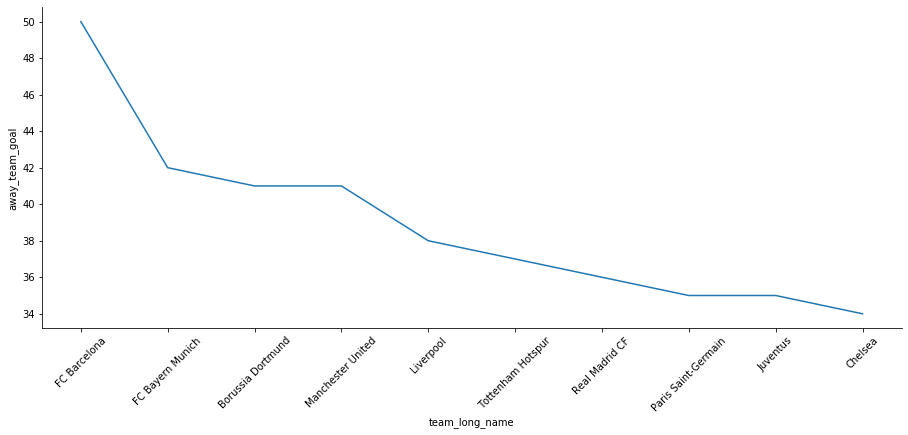

In [6]:
sns.relplot(
    data=tm_final2,
    x="team_long_name", y="away_team_goal",kind="line", aspect=20.7/8.27)

plt.xticks(rotation=45)
plt.show()

In [7]:
tm2_attr = tm_final2.join(teams_attr.set_index('team_api_id'), on="team_api_id", how='left', lsuffix='_left', rsuffix='_right')

In [8]:
tm2_attr = tm2_attr[['team_long_name', 'away_team_goal', 'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']].\
groupby("team_long_name").agg("mean").reset_index()

In [9]:
data = tm2_attr.sort_values(by="away_team_goal", ascending=False).head()
data.head()
# data = data.T.rename(columns={2:"barcelona", 3:"bayern", 0:"borussia", 6:"manchester", 5:"liverpool"})
# data = data.drop("team_long_name").head()
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.lineplot(data=data, x="barcelona", y="bayern")
# data.corr()

,team_long_name,away_team_goal,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
2,FC Barcelona,50.0,35.833333,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000
3,FC Bayern Munich,42.0,48.666667,35.166667,38.500000,40.666667,49.666667,57.166667,48.833333,55.166667
0,Borussia Dortmund,41.0,72.500000,46.500000,65.000000,44.500000,66.333333,59.333333,69.166667,46.000000
6,Manchester United,41.0,51.833333,45.833333,50.000000,63.166667,53.833333,45.000000,48.000000,54.833333
5,Liverpool,38.0,57.666667,44.333333,41.333333,47.833333,57.333333,51.000000,52.500000,56.000000


In [10]:
data.corr()

,away_team_goal,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
away_team_goal,1.000000,-0.725293,-0.730722,-0.079746,-0.622862,-0.327183,0.705848,-0.002375,0.730157
buildUpPlaySpeed,-0.725293,1.000000,0.806787,0.694209,0.337827,0.847813,-0.230328,0.673204,-0.949289
buildUpPlayPassing,-0.730722,0.806787,1.000000,0.615887,0.746891,0.702304,-0.635837,0.363045,-0.729632
chanceCreationPassing,-0.079746,0.694209,0.615887,1.000000,0.180147,0.868925,0.106156,0.848804,-0.639072
chanceCreationCrossing,-0.622862,0.337827,0.746891,0.180147,1.000000,0.076451,-0.947880,-0.282376,-0.415433
chanceCreationShooting,-0.327183,0.847813,0.702304,0.868925,0.076451,1.000000,0.100921,0.911031,-0.684659
defencePressure,0.705848,-0.230328,-0.635837,0.106156,-0.947880,0.100921,1.000000,0.481989,0.297471
defenceAggression,-0.002375,0.673204,0.363045,0.848804,-0.282376,0.911031,0.481989,1.000000,-0.538297
defenceTeamWidth,0.730157,-0.949289,-0.729632,-0.639072,-0.415433,-0.684659,0.297471,-0.538297,1.000000


In [34]:
# players_attr.sort_values(by="overall_rating", ascending=False).groupby("overall_rating").agg("mean")
# players[players["player_api_id"] == 30981]
players_attr["final"] = players_attr.iloc[0:,10:43].sum(axis=1)/33

In [36]:
players_attr.sort_values(by="final", ascending=False)

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,final
167137,167138,167138,13743,30618,2007-08-30 00:00:00,89.0,90.0,right,high,high,...,91.0,68.0,85.0,71.0,5.0,23.0,94.0,23.0,23.0,76.090909
167136,167137,167137,13743,30618,2008-08-30 00:00:00,88.0,90.0,right,high,high,...,90.0,68.0,84.0,71.0,5.0,23.0,95.0,23.0,23.0,76.000000
167134,167135,167135,13743,30618,2010-02-22 00:00:00,88.0,91.0,right,high,high,...,90.0,64.0,76.0,71.0,5.0,23.0,94.0,23.0,23.0,75.727273
167135,167136,167136,13743,30618,2009-08-30 00:00:00,88.0,91.0,right,high,high,...,90.0,64.0,76.0,71.0,5.0,23.0,94.0,23.0,23.0,75.727273
123017,123018,123018,45674,30675,2010-02-22 00:00:00,86.0,89.0,right,high,high,...,87.0,83.0,92.0,88.0,7.0,25.0,84.0,25.0,25.0,75.424242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131442,131443,131443,165272,69242,2007-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
175603,175604,175604,135200,36009,2007-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
163214,163215,163215,152065,26797,2007-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
138991,138992,138992,197937,193866,2013-12-06 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [40]:
players[players["player_api_id"] == 30618]

,Unnamed: 0,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
10012,10013,10028,30618,Steven Gerrard,13743,1980-05-30 00:00:00,182.88,183


In [42]:
# players_attr.corr()